<a href="https://colab.research.google.com/github/Shrutikapedamkar/CE888/blob/main/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
# FILE
import pandas as pd

# preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# vitualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectFromModel

# Load the data from bank-additional-full.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data preprocessing

In [ ]:
# Use LabelEncoder to convert the label into numbers.
# แปลงyกับn เป็น0กับ1
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
# Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
# เอาcolumnที่เป็นตัวเลขมาเท่านั้น ส่วนcolumnที่เป็นstring เช่น job มีadmin,blue-collar,entrepreneur,housemaid' ให้เปลี่ยนเป็นcolumn 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid'
# ถ้าเป็นadminจะเป็น 1(column job_admin.เท่านั้นที่เป็น1นอกนั้น0),0,0,0 ถ้าเป็ร blue-collar จะเป็น0,1,0,0 เป็นต้น
# เป็นการทำone-hot encoding
df = pd.get_dummies(df)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Column "duration" must be deleted
del df['duration']
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.info()

In [ ]:
# Check if there are any missing values in the dataset. If there are, drop the rows.
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


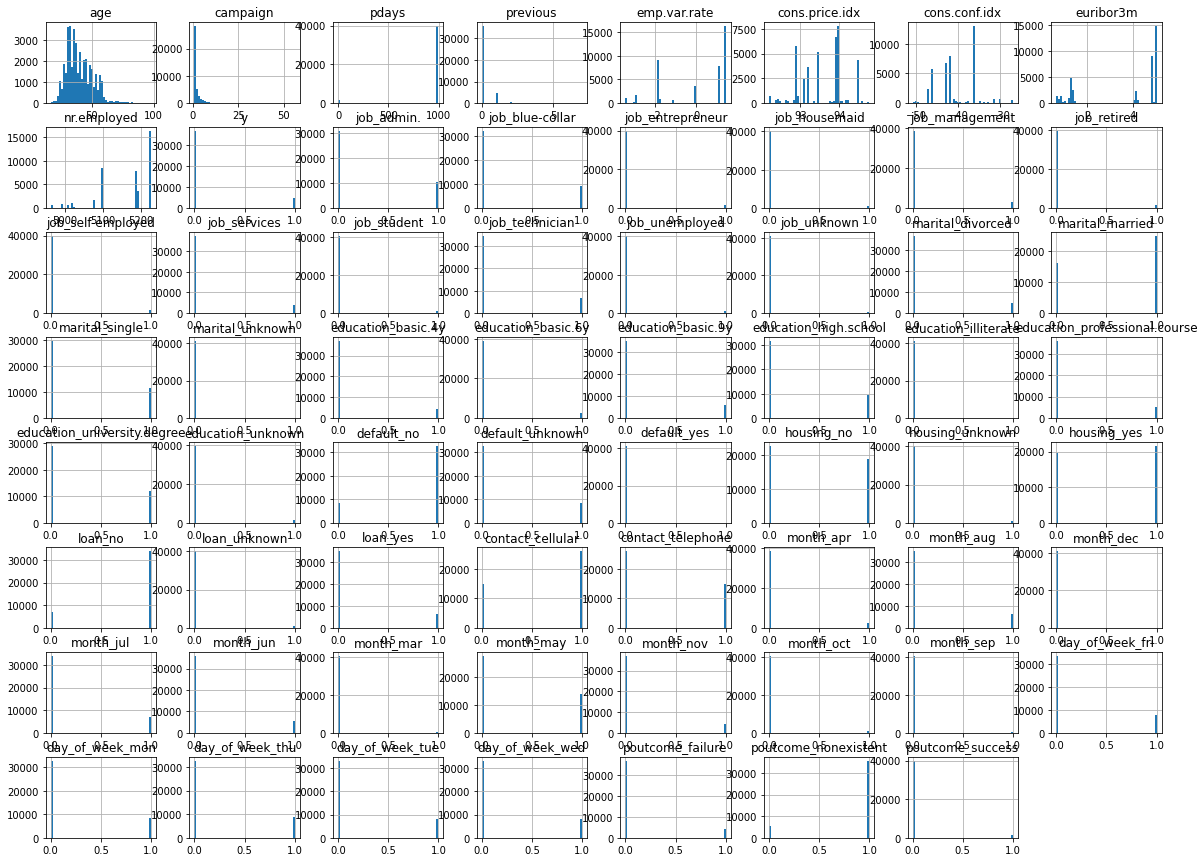

In [ ]:
# Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset 
# (i.e., divide the number of instances of the minority class by the total length of the dataframe).
_ = df.hist(bins=50, figsize=(20,15))

The data is heavily imbalanced since most of the label values are No (or 0). Only around 10% of the labels are Yes (or 1).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


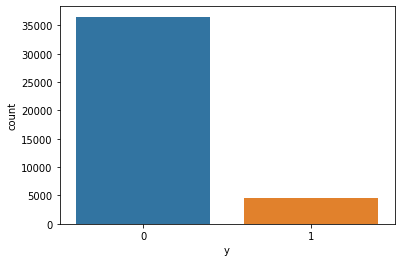

In [ ]:
sns_plot = sns.countplot(df['y'])
# sns_plot.savefig("histogram_lpc.pdf",bbox_inches='tight')

# Let's model the data

In [ ]:
y = df[['y']]
y


,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
X = df.drop(columns = "y")
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, 
# with a test size of 20% and random_state=50. 
# Make sure the train/test split is stratified using the stratify parameter (and check that it is!). 
# Stratified means that the percentages of classes in each fold remains constant.

# test_size คือ ขนาดอัตราส่วนของข้อมูลกลุ่ม test ต่อข้อมูลกลุ่ม train ในที่นี้เท่ากับ 0.2 คือ จะได้ข้อมูลกลุ่ม test 20 samples และข้อมูลกลุ่ม train 80 samples
# random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม
# stratify คือ การกำหนดการกระจายของข้อมูลที่ split ให้มีการกระจายเหมือน original dataset
# output ที่ได้มี 4 ตัว คือ data สำหรับ train และ test และ target สำหรับ train และ test ซึ่งจะเอาไปทำ classification ต่อไป

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

32950 8238 32950 8238


In [ ]:
# Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. 
# Ensure you are using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options 
# and choose one for cross-validation).

clf_rf = RandomForestClassifier(n_estimators=100,max_depth=3)
# X_train_arr = X_train.values
# y_train_arr = y_train.values
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(sorted(sklearn.metrics.SCORERS.keys()))
print("============================================")
print(classification_report(y_test, clf_rf.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

scores: .0.898088 +/- .0.003855
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_

In [ ]:
# จากการใช้sklearn.metrics.SCORERS.keys() ทำให้เห็นได้ว่า scoring='accuracy' ดีที่สุด
scores = cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy')
scores
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(classification_report(y_test, clf_rf.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

scores: .0.897906 +/- .0.003789
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.72      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238



In [ ]:
# Compare the cross-validation results of your classifier with that of a dummy classifier.
# สร้างdummy classifier เพื่อเปรียบเทียบmodel classifierของเราว่าดีเเค่ไหนถ้าเเย่กว่าควรพิจารณา
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("scores: .%2f" % (dummy_clf.score(X_train, y_train)))
print(classification_report(y_train, dummy_clf.predict(X_train)))


scores: .0.887344
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29238
           1       0.00      0.00      0.00      3712

    accuracy                           0.89     32950
   macro avg       0.44      0.50      0.47     32950
weighted avg       0.79      0.89      0.83     32950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Use GridSearchCV to find a better set of parameters for your random forest.
# MODEL
clf_rf = RandomForestClassifier()

# The number of trees in the forest.
n_estimators = [100,300]

# Maximum number of levels in tree
max_depth = [3,5,None]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


param_grid = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap': bootstrap
}


CV_rfc = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300]})

In [ ]:
# Print the cross-validation metric (whichever you previously chose) that you obtain 
# for the random forest for the best parameters found with GridSearchCV (on your training set)
CV_rfc.best_params_
# {'bootstrap': True,
#  'max_depth': None,
#  'max_features': 'auto',
#  'min_samples_leaf': 4,
#  'min_samples_split': 5,
#  'n_estimators': 300}

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
# quiz 10
the_best_model = RandomForestClassifier(n_estimators = 300,
                                        max_depth= None,
                                        max_features = 'auto',
                                        bootstrap=True,
                                        min_samples_leaf = 4,
                                        min_samples_split = 5)
the_best_model.fit(X_train, y_train)
scores = cross_val_score(the_best_model, X_train, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(sorted(sklearn.metrics.SCORERS.keys()))
print("============================================")
print(classification_report(y_test, the_best_model.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

scores: .0.900364 +/- .0.004364
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_

[ 7  8  0  2  4 61  6  5  1  3 60 59 31 36 55 38  9 52 56 57 22 43 28 58
 42 50 49 54 23 18 10 39 30 44 27 41 48 34 21 14 33 25 16 13 17 53 45 47
 26 32 15 51 11 19 12 46 40 37 20 24 29 35]
Feature ranking:
1. euribor3m (0.141463)
2. nr.employed (0.115641)
3. age (0.089117)
4. pdays (0.064661)
5. emp.var.rate (0.052668)
6. poutcome_success (0.052209)
7. cons.conf.idx (0.050710)
8. cons.price.idx (0.042050)
9. campaign (0.037532)
10. previous (0.021039)
11. poutcome_nonexistent (0.013694)
12. poutcome_failure (0.012753)
13. education_university.degree (0.012415)
14. housing_no (0.012281)
15. day_of_week_mon (0.012228)
16. housing_yes (0.012209)
17. job_admin. (0.011729)
18. month_oct (0.011442)
19. day_of_week_thu (0.010906)
20. day_of_week_tue (0.010780)
21. marital_married (0.010754)
22. contact_telephone (0.010216)
23. education_high.school (0.009885)
24. day_of_week_wed (0.009781)
25. contact_cellular (0.009750)
26. month_may (0.009698)
27. month_mar (0.009692)
28. day_of_week_fri (

(0.0, 0.2591513270975771)

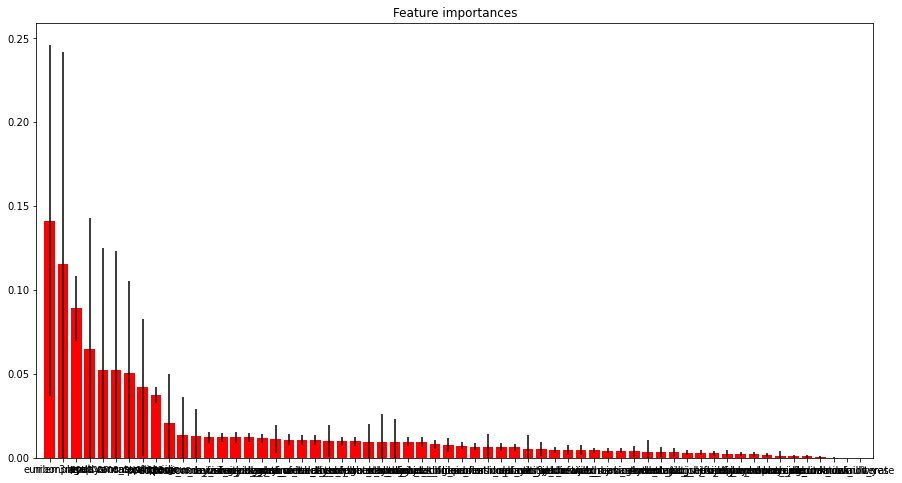

In [ ]:
# What are the top 3 features?

features = list(X.columns)

importances = the_best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in the_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')

In [ ]:
# quiz 10 create mode.pkl
import pickle as pkl

outp = open('/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/model.pkl', 'wb')
pkl.dump(the_best_model, outp, -1)  # where clf is your classifier
outp.close()

In [ ]:
# quiz 10 create testset.csv
test_set = X_test.copy()
test_set['y'] = y_test["y"]
test_set.to_csv('/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/testset.csv')
test_set

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
10868,41,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
29141,45,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,1,...,0,1,0,0,0,0,0,1,0,0
23977,38,2,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
33175,45,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,0,...,0,0,0,0,1,0,0,1,0,0
19349,56,1,999,0,1.4,93.444,-36.1,4.967,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,39,1,999,0,-2.9,92.963,-40.8,1.215,5076.2,1,...,0,0,1,0,0,0,0,1,0,0
34585,36,1,999,0,-1.8,92.893,-46.2,1.266,5099.1,1,...,0,0,0,1,0,0,0,1,0,0
17268,45,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
3556,37,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,1,0,0,0,0,0,1,0,0


# QUIZ

In [ ]:
# quiz(1).Which of the following are valid metrics to evaluate the performance of a classifier on an unbalanced dataset?
# ans:Precision,F1 score,Recall

In [ ]:
# quiz(2).Accuracy is a valid metric to evaluate the performance of a regressor.
# ans:False

In [ ]:
# quiz(3).How many rows contain NaN values in the Bank dataset when you load it?
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/bank-additional-full.csv", delimiter=";")
# ans: 0
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


In [ ]:
# quiz(4).In the bank dataset, how many columns does the dataframe have after the following preprocessing steps?

#     * Use LabelEncoder to convert the label into numbers.
#     * Convert the features to one-hot encoding using `df_dummies = pd.get_dummies(df)`
#     * Column "duration" must be deleted
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df = pd.get_dummies(df)
del df['duration']
df
print("sum of column =",len(df.columns))

sum of column = 63


In [ ]:
# quiz(5).Divide the bank dataset into a training and test set using train_test_split,
#  keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

# Perform 10-fold cross-validation using a dummy classifier with strategy "stratified" as a parameter. 
# Report the average F1 score with two numbers after the floating point (e.g., 0.56).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))


dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
# print("scores: .%2f" % (dummy_clf.score(X_train, y_train)))
# print(classification_report(y_train, dummy_clf.predict(X_train)))

scores = cross_val_score(dummy_clf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

In [ ]:
# quiz(6).Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
# using random_state=50 when calling the function.

# Perform 10-fold cross-validation using as a classifier a random forest with 250 estimators and a maximum depth of 6. 
# Report the average F1 score with two numbers after the floating point (e.g., 0.56)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 250,max_depth= 6)
clf_rf.fit(X_train, y_train)
# print("scores: .%2f" % (dummy_clf.score(X_train, y_train)))
# print(classification_report(y_train, dummy_clf.predict(X_train)))
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was

scores: .0.283319 +/- .0.045673


In [ ]:
# quiz(7).Divide your training and test set using train_test_split and 
# keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

# Perform 10-fold cross-validation using as a classifier a random forest with 400 estimators and a maximum depth of 6. 
# Report the average F1 score with two numbers after the floating point (e.g., 0.56)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 400,max_depth= 6)
clf_rf.fit(X_train, y_train)
# print("scores: .%2f" % (dummy_clf.score(X_train, y_train)))
# print(classification_report(y_train, dummy_clf.predict(X_train)))
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array

scores: .0.282219 +/- .0.046272


In [ ]:
# quiz(8).Divide your training and test set using train_test_split and 
# keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

# Report the generalisation error of a random forest classifier with 200 estimators 
# and a maximum depth of 10. Report the F1 score with two numbers after the floating point (e.g., 0.56).

# Make sure you set the random_state parameter of RandomForestClassifier to 60.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 200,max_depth= 10,random_state=60)
clf_rf.fit(X_train, y_train)

from sklearn.metrics import f1_score

y_pred = clf_rf.predict(X_test)
f1_score(y_test, y_pred)
# scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
# print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
# # clf_rf.predict(X_test)
# print(classification_report(y_test, clf_rf.predict(X_test)))

# print(clf_rf.predict(X_test))

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.35742652899126287

32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array

scores: .0.329826 +/- .0.041728
[ 8  7  2 61  4  6  5  0  3  1 60 59 52 49 42 50 43 55 44 31 56 54 38 57
 36 10 23 48 22 58 14 28 33 17 34 53  9 39 18 30 41 27 21 25 32 45 16 13
 51 47 15 26 19 46 12 40 37 20 11 24 29 35]
Feature ranking:
1. nr.employed (0.146933)
2. euribor3m (0.142862)
3. pdays (0.093918)
4. poutcome_success (0.074663)
5. emp.var.rate (0.066610)
6. cons.conf.idx (0.065194)
7. cons.price.idx (0.053372)
8. age (0.044744)
9. previous (0.025034)
10. campaign (0.017224)
11. poutcome_nonexistent (0.016363)
12. poutcome_failure (0.015769)
13. month_oct (0.014927)
14. month_mar (0.014474)
15. contact_cellular (0.013814)
16. month_may (0.013082)
17. contact_telephone (0.012080)
18. day_of_week_mon (0.008207)
19. month_apr (0.007968)
20. education_university.degree (0.006273)
21. day_of_week_thu (0.005442)
22. day_of_week_fri (0.005422)
23. housing_yes (0.005376)
24. day_of_week_tue (0.005311)
25. housing_no (0.005295)
26. job_blue-collar (0.005134)
27. marital_single (0.00512

(0.0, 0.33834636735981893)

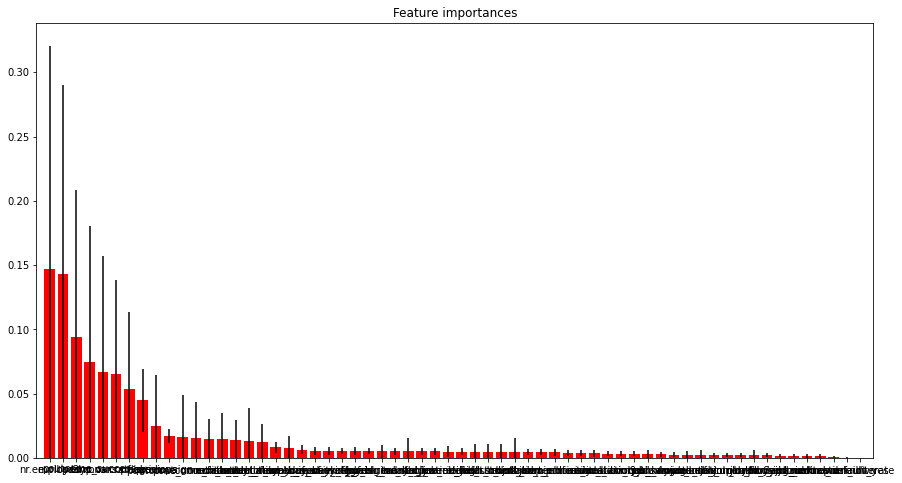

In [ ]:
# quiz(9).Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
# using random_state=50 when calling the function.

# Train a random forest classifier with 1000 estimators and a maximum depth of 10, setting the random_state parameter to 60.
# What are the top 3 features?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 1000,max_depth= 10,random_state=60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

# What are the top 3 features?
features = list(X.columns)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')




32950 8238 32950 8238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array

scores: .0.282892 +/- .0.047200
[ 8  7  2 61  4  6  5  3  0 60 59 49 52 50 42 43 44 53 48  1 55 33 10 17
 34 14 31 45 56 57 23 27 51 46 47 58 22 28 54 18 38 36 16  9 30 39 41 32
 25 21 15 19 13 20 26 40 37 11 12 24 29 35]
Feature ranking:
1. nr.employed (0.169919)
2. euribor3m (0.149738)
3. pdays (0.115682)
4. poutcome_success (0.096064)
5. emp.var.rate (0.092905)
6. cons.conf.idx (0.078494)
7. cons.price.idx (0.056845)
8. previous (0.028729)
9. age (0.024708)
10. poutcome_nonexistent (0.021374)
11. poutcome_failure (0.018949)
12. month_mar (0.018282)
13. month_oct (0.015799)
14. month_may (0.014310)
15. contact_cellular (0.012540)
16. contact_telephone (0.011753)
17. month_apr (0.006585)
18. month_sep (0.006347)
19. month_jun (0.005000)
20. campaign (0.004507)
21. day_of_week_mon (0.003741)
22. default_no (0.003327)
23. job_blue-collar (0.003273)
24. job_student (0.003189)
25. default_unknown (0.003129)
26. job_retired (0.002874)
27. education_university.degree (0.002085)
28. month_au

(0.0, 0.4285867295480885)

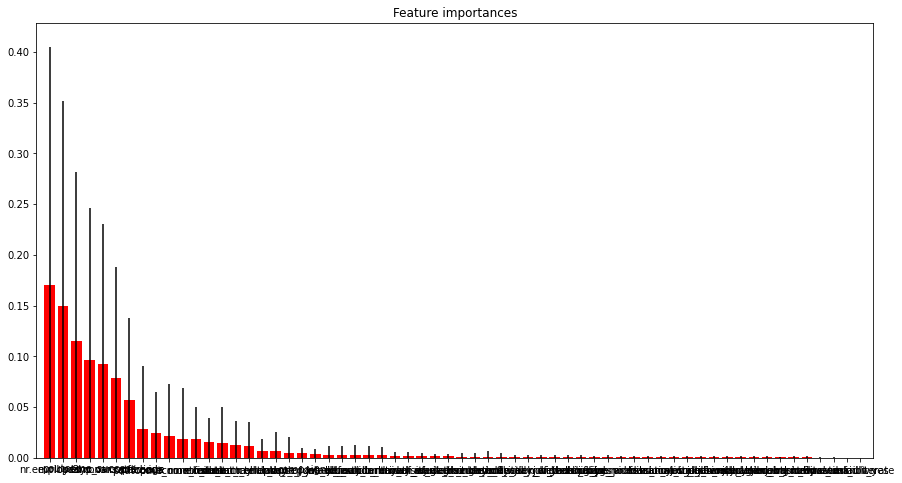

In [ ]:
# test.Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
# using random_state=50 when calling the function.

# Train a random forest classifier with 1000 estimators and a maximum depth of 10, setting the random_state parameter to 60.
# What are the top 3 features?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 400,max_depth= 6,random_state=60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

# What are the top 3 features?
features = list(X.columns)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')




In [ ]:
# quiz(10).
# If this question fails when you upload your model, 
# drop me an email with a link to your notebook so I can mark you manually.

# Now you're free to explore any preprocessing and models you want and 
# create a model that can obtain more than 90% F1-score on the test set of the banking dataset.

# When you're done, you just need to upload the model and 
# a csv file containing your preprocessed test set (named 'testset.csv' -- the label has to be in a column called 'y')

the_best_model = RandomForestClassifier(n_estimators = 300,
                                        max_depth= None,
                                        max_features = 'auto',
                                        bootstrap=True,
                                        min_samples_leaf = 4,
                                        min_samples_split = 5)
the_best_model.fit(X_train, y_train)
scores = cross_val_score(the_best_model, X_train, y_train, cv=10)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("============================================")
print(sorted(sklearn.metrics.SCORERS.keys()))
print("============================================")
print(classification_report(y_test, the_best_model.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

scores: .0.900486 +/- .0.004915
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_

In [ ]:
# quiz 10 create mode.pkl
import pickle as pkl

outp = open('/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/model.pkl', 'wb')
pkl.dump(the_best_model, outp, -1)  # where clf is your classifier
outp.close()

In [ ]:
# quiz 10 create testset.csv
test_set = X_test.copy()
test_set['y'] = y_test["y"]
test_set.to_csv('/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab3_RandomForestClassifier_validation/testset.csv')
test_set

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
10868,41,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
29141,45,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,1,...,0,1,0,0,0,0,0,1,0,0
23977,38,2,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
33175,45,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,0,...,0,0,0,0,1,0,0,1,0,0
19349,56,1,999,0,1.4,93.444,-36.1,4.967,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,39,1,999,0,-2.9,92.963,-40.8,1.215,5076.2,1,...,0,0,1,0,0,0,0,1,0,0
34585,36,1,999,0,-1.8,92.893,-46.2,1.266,5099.1,1,...,0,0,0,1,0,0,0,1,0,0
17268,45,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
3556,37,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,1,0,0,0,0,0,1,0,0
